# 初始神经网络

In [1]:
from keras.datasets import mnist

In [2]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [9]:
from keras import models
from keras import layers

network=models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax'))

In [10]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [11]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

In [12]:
from keras.utils import to_categorical

train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [13]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 5ms/step - loss: 0.2602 - accuracy: 0.9234
Epoch 2/5
111/469 [======>.......................] - ETA: 1s - loss: 0.1202 - accuracy: 0.96

limit_output extension: Maximum message size of 10000 exceeded with 10003 characters

In [14]:
test_loss,test_acc=network.evaluate(test_images,test_labels)
print('test_acc:',test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0683 - accuracy: 0.9785
test_acc: 0.9785000085830688


# 神经网络的数据表示

## 标量

In [15]:
import numpy as np

In [16]:
x=np.array(12)
x

array(12)

In [17]:
x.ndim

0

## 向量

In [18]:
x=np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [19]:
x.ndim

1

## 矩阵

In [20]:
x=np.array([[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]])

In [21]:
x.ndim

2

## 3D张量与更高维度张量

In [22]:
x=np.array([[[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]],
           [[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]],
           [[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]]])

In [23]:
x.ndim

3

## 关键属性

In [24]:
from keras.datasets import mnist

In [25]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [26]:
print(train_images.ndim)

3


In [27]:
print(train_images.shape)

(60000, 28, 28)


In [28]:
print(train_images.dtype)

uint8


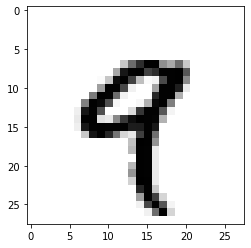

In [29]:
digit=train_images[4]

import matplotlib.pyplot as plt 
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()

## 在Numpy中操作张量

In [30]:
my_slice=train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [31]:
my_slice=train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [32]:
my_slice=train_images[10:100,0:28,0:28]
my_slice.shape

(90, 28, 28)

In [33]:
my_slice=train_images[:,14:,14:]
my_slice.shape

(60000, 14, 14)

In [34]:
my_slice=train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

## 数据批量的概念

In [35]:
batch=train_images[:128]

In [36]:
batch=train_images[128:256]

In [37]:
# batch=train_images[128*n:128*(n+1)]

## 现实世界中的数据张量

## 向量数据

## 时间序列数据或序列数据

## 图像数据

## 视频数据

# 神经网络的“齿轮”：张量运算

In [38]:
import keras
keras.layers.Dense(512,activation='relu')
# output=relu(dot(W,input)+b)

## 逐元素运算

In [39]:
def naive_relu(x):
    # x是一个Numpy的2D张量
    assert len(x.shape)==2
    
    # 避免覆盖输入张量
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]=max([i,j],0)
    return x

In [40]:
def naive_add(x,y):
    # x和y是Numpy的2D张量
    assert len(x.shape)==2
    assert x.shape==y.shape
    
    # 避免覆盖输入张量
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[i,j]
            
    return x

## 广播

In [41]:
def naive_add_matrix_and_vector(x,y):
    # x是一个Numpy的2D张量
    assert len(x.shape)==2
    # y是一个Numpy向量
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]
    
    # 避免覆盖输入张量
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[j]
    return x

In [42]:
import numpy as np

# x是形状为(64,3,32,10)的随机向量
x=np.random.random((64,3,32,10))
print('x shape:',x.shape)
# y是形状为(32,10)的随机向量
y=np.random.random((32,10))
print('y shape:',y.shape)

# 输出z的形状是(64, 3, 32, 10)，与x相同
z=np.maximum(x,y)
print('z shape:',z.shape)

x shape: (64, 3, 32, 10)
y shape: (32, 10)
z shape: (64, 3, 32, 10)


## 张量点积

In [43]:
def naive_vector_dot(x,y):
    # x和y都是Numpy向量
    assert len(x.shape)==1
    assert len(y.shape)==1
    assert x.shape[0]==y.shape[1]
    
    z=0.
    for i in range(x.shape[0]):
        z+=x[i]*y[i]
    return z

In [44]:
import numpy as np

def naive_matrix_vector_dot(x,y):
    # x是一个Numpy矩阵
    assert len(x.shape)==2
    # y是一个Numpy向量
    assert len(y.shape)==1
    # x的第一维和y的第0位大小必须相同
    assert x.shape[1]==y.shape[0]
    
    # 这个运算返回一个全是0的向量，其形状与x.shape[0]相同
    z=np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i]+=x[i,j]*y[j]
    return z

In [45]:
def naive_matrix_vector_dot(x,y):
    z=np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i]=naive_vector_dot(x[i,:],y)
        return z

In [46]:
def naive_matrix_dot(x,y):
    # x和y都是Numpy矩阵
    assert len(x.shape)==2
    assert len(y.shape)==2
    # x的第1维和y的第0维大小必须相同
    assert x.shape[1]==y.shape[0]
    
    # 这个运算返回特定形式的零矩阵
    z=np.zeros((x.shape[0],y.shape[1]))
    # 遍历x的所有行...
    for i in range(x.shape[0]):
        # ...然后遍历y的所有列
        for j in range(y.shape[1]):
            row_x=x[i,:]
            column_y=y[:,j]
            z[i,j]=naive_vector_dot(row_x,column_y)
    return z

## 张量变形

In [47]:
train_images=train_images.reshape((60000,28*28))

In [48]:
x=np.array([[0.,1.],
           [2.,3.],
           [4.,5.]])
print(x.shape)

(3, 2)


In [49]:
x=x.reshape((6,1))

In [50]:
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [51]:
x=x.reshape((2,3))

In [52]:
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [53]:
# 创建一个形状为(300,20)的零矩阵
x=np.zeros((300,20))
x=np.transpose(x)
print(x.shape)

(20, 300)


## 张量运算的几何解释

## 深度学习的几何解释

# 神经网络的“引擎”：基于梯度的优化